In [ ]:
!pip install torch torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv


  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
  Using cached torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_cluster-1.6.3.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_spline_conv-1.2.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1104576 sha256=363e91c7e9ade04a3856f0de85bacdf96bf685f169303766fe07c37e5fffd9bc
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
  Created wheel for torch-cluster: filename=torch_cluster-1.6.3-cp310-cp310-linux_x86_64.whl size=728767 sha256=fcc93664ca420b0ced4e0aa5d66bdcc95ef765c9eab03441b70c9f246fcf331f
  Stored in directory: /root/.cache/pip/wheels/51/78/c3/536637b3c

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generator: Produces fake data
class Generator(nn.Module):
    def __init__(self, noise_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()  # Scale output between [-1, 1]
        )

    def forward(self, z):
        return self.model(z)

# Discriminator: Distinguishes real vs fake
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output probability
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
noise_dim = 100  # Dimension of the noise vector
data_dim = 784  # Example: Flattened MNIST images (28x28)
generator = Generator(noise_dim, data_dim)
discriminator = Discriminator(data_dim)

# Loss and optimizers
criterion = nn.BCELoss()
gen_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
disc_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

# Training loop
num_epochs = 1000
batch_size = 64

for epoch in range(num_epochs):
    # Step 1: Train Discriminator
    real_data = torch.randn((batch_size, data_dim))  # Replace with real dataset
    fake_data = generator(torch.randn((batch_size, noise_dim))).detach()

    real_labels = torch.ones((batch_size, 1))
    fake_labels = torch.zeros((batch_size, 1))

    # Discriminator loss
    real_loss = criterion(discriminator(real_data), real_labels)
    fake_loss = criterion(discriminator(fake_data), fake_labels)
    disc_loss = real_loss + fake_loss

    disc_optimizer.zero_grad()
    disc_loss.backward()
    disc_optimizer.step()

    # Step 2: Train Generator
    fake_data = generator(torch.randn((batch_size, noise_dim)))
    gen_loss = criterion(discriminator(fake_data), real_labels)  # Fool the discriminator

    gen_optimizer.zero_grad()
    gen_loss.backward()
    gen_optimizer.step()

    # Logging
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Generator Loss: {gen_loss.item()}, Discriminator Loss: {disc_loss.item()}")


Epoch 0, Generator Loss: 0.6683079600334167, Discriminator Loss: 1.3723423480987549
Epoch 100, Generator Loss: 0.9544274806976318, Discriminator Loss: 0.7920445799827576
Epoch 200, Generator Loss: 2.632981300354004, Discriminator Loss: 1.6441552639007568
Epoch 300, Generator Loss: 2.4315693378448486, Discriminator Loss: 0.5147466659545898
Epoch 400, Generator Loss: 2.4886441230773926, Discriminator Loss: 0.5853495001792908
Epoch 500, Generator Loss: 2.7280800342559814, Discriminator Loss: 0.3384077548980713
Epoch 600, Generator Loss: 2.040461301803589, Discriminator Loss: 0.428703635931015
Epoch 700, Generator Loss: 1.63011634349823, Discriminator Loss: 0.4656405746936798
Epoch 800, Generator Loss: 1.3362513780593872, Discriminator Loss: 0.4608114957809448
Epoch 900, Generator Loss: 1.5144469738006592, Discriminator Loss: 0.281271368265152


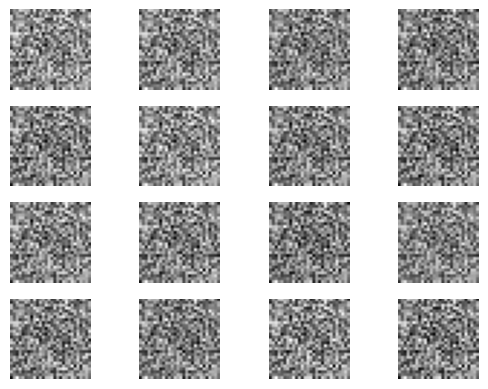

In [8]:
# Generate fake data
with torch.no_grad():
    noise = torch.randn((16, noise_dim))  # Generate 16 random noise vectors
    generated_data = generator(noise)

# Example: Reshape for image datasets like MNIST
generated_images = generated_data.view(-1, 1, 28, 28)  # Reshape for 28x28 images

# Visualize generated samples (e.g., using matplotlib for images)
import matplotlib.pyplot as plt

for i in range(16):  # Display the first 16 generated images
    plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i][0].numpy(), cmap='gray')
    plt.axis('off')
plt.show()
